In [182]:
import pandas as pd

In [183]:
df = pd.read_csv('train.csv', dtype={'date':object, 'fullVisitorId':object, 'visitId':object})
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [184]:
df.shape

(12283, 12)

In [185]:
df.fullVisitorId.nunique()

9997

In [186]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [187]:
import json

In [188]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [189]:
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [190]:
df = df.drop(columns=dicionarios, axis=1)

A coluna adwordsClickInfo é composta por dicionários e não representa importância no trabalho.

In [191]:
df = df.drop(columns=['adwordsClickInfo'], axis=1)

Colunas com somente um único valor não são úteis para o treinamento.

In [192]:
colunas_na = [coluna for coluna in df.columns if df[coluna].nunique() == 1]
df = df.drop(columns=colunas_na, axis=1)

In [193]:
quantitativas = ['hits', 'pageviews', 'transactionRevenue']

In [194]:
for coluna in quantitativas:
    df[coluna] = pd.to_numeric(df[coluna])

In [195]:
df.transactionRevenue.fillna(0, inplace=True)

A base extraída do Google possui a coluna transactionRevenue multiplicada por 1000000.

In [196]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [197]:
df_usuarios = df.groupby(['fullVisitorId'], as_index=False)[quantitativas].sum()
df_usuarios.head()

,fullVisitorId,hits,pageviews,transactionRevenue
0,0002365800130207040,1,1,0.0
1,0010286039787739137,4,3,0.0
2,0011056874471185769,2,2,0.0
3,0014443856125569702,1,1,0.0
4,0017260116665815114,2,2,0.0


In [198]:
X = df_usuarios.drop(columns=['transactionRevenue'], axis=1)
y = df_usuarios.transactionRevenue.copy()

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [203]:
y_pred = linear_regression.predict(X_test)

In [204]:
df_resultado = pd.DataFrame()

df_resultado['revenue'] = y_test
df_resultado['predict'] = y_pred
df_resultado['erro'] = df_resultado['predict'] - df_resultado['revenue']

df_resultado.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [205]:
df_resultado[df_resultado.revenue > 0].head()

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275


In [206]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [207]:
mse = mean_squared_error(y_test, y_pred)
mse

807.2459296820928

In [208]:
rmse = np.sqrt(mse)
rmse

28.412073660366516

In [209]:
df.transactionRevenue.std()

20.893895780073333

In [210]:
import seaborn as sns

<Axes: >

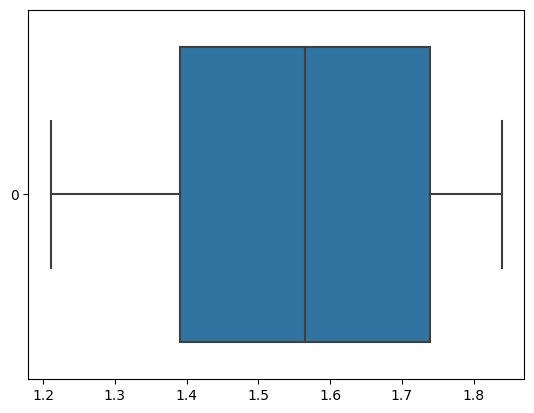

In [211]:
sns.boxplot(y_pred, orient='h')

<Axes: >

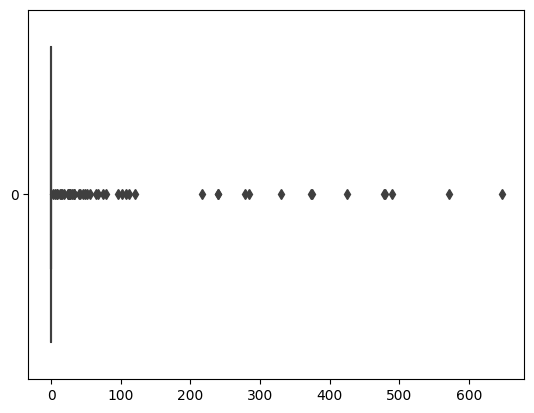

In [212]:
sns.boxplot(y_test, orient='h')

C:\Users\Predify\AppData\Local\Temp\ipykernel_11844\2342860189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred - y_test)


<Axes: xlabel='transactionRevenue', ylabel='Density'>

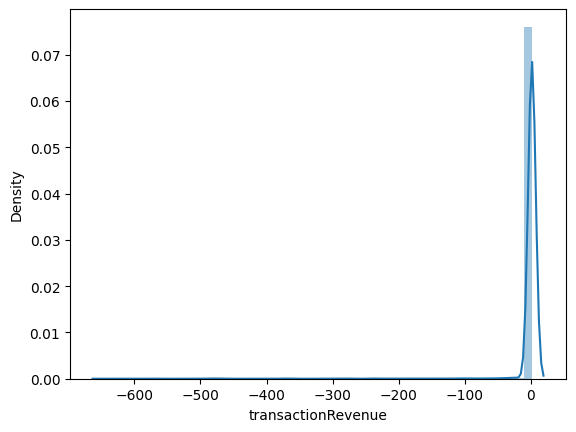

In [213]:
sns.distplot(y_pred - y_test)

In [216]:
df_clientes = df.groupby(['fullVisitorId'], as_index=False).visitNumber.max()
df_clientes

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


In [218]:
df_sem_duplicados = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])
df_sem_duplicados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,networkDomain,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,1,1,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,comcast.net,(not set),google,organic,(not provided),NaN,NaN,1,1,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,att.net,(not set),google,organic,(not provided),NaN,NaN,5,4,0.0


In [220]:
df_clientes = pd.merge(df_clientes, df_sem_duplicados, left_on=['fullVisitorId', 'visitNumber'],
                        right_on=['fullVisitorId', 'visitNumber'], how='left')
df_clientes.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,networkDomain,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,wildpark.net,(not set),youtube.com,referral,NaN,/yt/about/ru/,NaN,1,1,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not set),(not set),google,organic,(not provided),NaN,NaN,4,3,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,pldt.net,(not set),youtube.com,referral,NaN,/yt/about/,NaN,2,2,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,rdsnet.ro,(not set),youtube.com,referral,NaN,/yt/about/ro/,NaN,1,1,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,comcastbusiness.net,(not set),(direct),(none),NaN,NaN,NaN,2,2,0.0
